In [ ]:
import pandas as pd
import numpy as np
import copy
import warnings

warnings.filterwarnings("ignore")

def adaptive_format(x):
    if x % 1 == 0:
        return f"{x:.0f}"
    else:
        return f"{x:.2f}"

def adaptive_format(x):
    if x % 1 == 0:
        return f"{x:.0f}"
    else:
        return f"{x:.3f}"

pd.set_option('display.float_format', lambda x: adaptive_format(x))

<font color=b3713b><h1><b>$1$. Investigating the distribution based on the data</b></h1>

In [ ]:
# Loading data
data = pd.read_csv('HW1_var_7.csv', sep = ';')

# Remove the variable 'Номер варианта' as it is technical in nature
data = data.drop('Номер варианта', axis=1)

df = copy.deepcopy(data)

In [ ]:
data

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000007,2НДФЛ,Покупка недвижимости/ строительство,0,0.570,мужской,1,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000027,Форма банка (без печати работодателя),Ремонт,1,0.520,женский,0,0,Высшее/Второе высшее/Ученая степень,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000047,Поступление зарплаты на счет,Ремонт,1,0.270,женский,0,0,высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000067,Поступление зарплаты на счет,Ремонт,1,0.280,женский,0,0,высшее,специалист,...,1,94,97,1,0,0,0,0,0,0
4,1000087,Поступление зарплаты на счет,Покупка бытовой техники,0,0.230,мужской,0,0,высшее,менеджер по продажам,...,1,2,10,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,1204767,Поступление зарплаты на счет,Ремонт,0,0.360,мужской,0,0,Высшее/Второе высшее/Ученая степень,менеджер по продажам,...,2,15,63,1,0,0,0,0,0,0
10239,1204787,Поступление зарплаты на счет,Покупка недвижимости/ строительство,1,0.230,мужской,0,0,второе высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10240,1204807,2НДФЛ,Ремонт,1,0.590,женский,1,0,высшее,менеджер среднего звена,...,0,18,89,1,0,0,0,0,0,0
10241,1204827,Форма банка (без печати работодателя),Ремонт,0,0.230,мужской,0,0,среднее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=mediumseagreen><h2><b>$\alpha$. Calculating the number of unique values, zeros, and empty values + percentage of the total count</b></h2>

In [ ]:
# Function for calculating metrics
def calculate_metrics(df):
    metrics = pd.DataFrame(index=df.columns, columns=['Unique', 'Empty', 'Zero', 'Empty (%)', 'Zero (%)'])
    for col in df.columns:
        metrics.loc[col, 'Unique'] = df[col].nunique(dropna=True)
        metrics.loc[col, 'Empty'] = df[col].isnull().sum()
        if df[col].dtype == np.number or df[col].dtype == 'float64' or df[col].dtype == 'int64':
            metrics.loc[col, 'Zero'] = (df[col] == 0).sum()
        else:
            metrics.loc[col, 'Zero'] = (df[col] == '').sum()
        metrics.loc[col, 'Empty (%)'] = metrics.loc[col, 'Empty'] / len(df) * 100
        metrics.loc[col, 'Zero (%)'] = metrics.loc[col, 'Zero'] / len(df) * 100
    return metrics

# Function call
metrics = calculate_metrics(df)
metrics

,Уникальные,Пустые,Нулевые,Доля пустых,Доля нулевых
ID,10243,0,0,0,0
INCOME_BASE_TYPE,4,63,0,0.615,0
CREDIT_PURPOSE,10,0,0,0,0
INSURANCE_FLAG,2,0,4088,0,39.910
DTI,58,123,1,1.201,0.010
SEX,2,0,0,0,0
FULL_AGE_CHILD_NUMBER,8,0,6085,0,59.406
DEPENDANT_NUMBER,4,0,10216,0,99.736
EDUCATION,9,0,0,0,0
EMPL_TYPE,9,11,0,0.107,0


<p>First, let's count the number of rows, it coincides with the number of ID values (they are unique and matched to each row) - 10243.</p>
<p>In general, we can see that there are missing values in our data, so before continuing the analysis, we need to clean our data. To do this, we will conduct a separate analysis for each variable, determine the nature of the missing values, and the method for their elimination.</p>


<font color=mediumseagreen><h2><b>$\beta$. Data cleaning</b></h2>

<font color=703bb3><h2><b>Classification of variables</b></h2>

As known, categorical variables can also take numerical values, so it's necessary to manually analyze each variable.

In [ ]:
# Selecting quantitative variables
quantitative_vars = df.select_dtypes(include=[np.number])

# Outputting quantitative variables
print(quantitative_vars.columns)

# Selecting categorical variables
categorical_vars = df.select_dtypes(include=['object'])

print(categorical_vars.columns)

Index(['ID', 'INSURANCE_FLAG', 'DTI', 'FULL_AGE_CHILD_NUMBER',
       'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age',
       'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
       'avg_num_delay', 'if_zalog', 'num_AccountActive180',
       'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
       'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months',
       'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year',
       'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage',
       'ninety_vintage'],
      dtype='object')
Index(['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE',
       'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS'],
      dtype='object')


After a semantic check, we reclassified some quantitative variables as qualitative. For example, even though the variable BANKACCOUNT_FLAG takes numerical values, it is still considered categorical.

In [ ]:
# List of columns to move
columns_to_move = ['INSURANCE_FLAG', 'BANKACCOUNT_FLAG', 'if_zalog', 'dlq_exist', 'thirty_in_a_year',
                  'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']

# Reclassifying variables
categorical_vars = categorical_vars.append(quantitative_vars[columns_to_move], ignore_index=True)
quantitative_vars = quantitative_vars.drop(columns=columns_to_move)

# Outputting quantitative variables
print('Number of quantitative variables:',len(quantitative_vars.columns))
print('Quantitative variables: ',quantitative_vars.columns)

# Outputting categorical variables
print('Number of categorical variables:',len(categorical_vars.columns))
print('Categorical variables: ',categorical_vars.columns)

Количество количественных переменных: 24
Количественные переменные:  Index(['ID', 'DTI', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER',
       'Period_at_work', 'age', 'max90days', 'max60days', 'max30days',
       'max21days', 'max14days', 'avg_num_delay', 'num_AccountActive180',
       'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
       'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months',
       'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan'],
      dtype='object')
Количество категориальных переменных: 19
Категориальные переменные:  Index(['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE',
       'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS',
       'INSURANCE_FLAG', 'BANKACCOUNT_FLAG', 'if_zalog', 'dlq_exist',
       'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year',
       'thirty_vintage', 'sixty_vintage', 'ninety_vintage'],
      dtype='object')


<font color=703bb3><h2><b>Categorical data</b></h2>

Now let's proceed with the analysis of each categorical variable:

1. INCOME_BASE_TYPE - takes 4 values, almost no missing or zero values.
2. CREDIT_PURPOSE - 10 values, no missing or zero values.
3. SEX - 2 values, no missing or empty values.
4. EDUCATION - 10 values, no missing or zero values.
5. EMPL_TYPE - 9 values, minimal missing or zero values.
6. EMPL_SIZE - 7 values, no NA, a small number of NA values.
7. EMPL_PROPERTY - 9 values, 2335 NA (22%).
8. EMPL_FORM - 6 values, 6280 NA (61%).
9. FAMILY_STATUS - 6 values, 6281 NA (61%).
10. ID - unique values -> no correlation, then delete.
12. BANKACCOUNT_FLAG - 3 values, 2335 empty.

After analyzing the table with missing values, it was observed that the number of missing values for the next variables is similar, and very close to the number of NA for variables 8 and 9. Therefore, a table was created to count matches of empty values. The table below shows that rows with missing values match in 100% of cases for variables 8, 9, and 13-20. Hence, it was decided to drop those rows from the dataset because of the 60% missing values.

13. if_zalog - 6641 missing values (64.835%)
14. dlq_exist - 6641 missing values (64.835%)
15. thirty_in_a_year - 6641 missing values (64.835%)
16. sixty_in_a_year - 6641 missing values (64.835%)
17. ninety_in_a_year - 6641 missing values (64.835%)
18. thirty_vintage - 6641 missing values (64.835%)
19. sixty_vintage - 6641 missing values (64.835%)
20. ninety_vintage - 6641 missing values (64.835%)

In [ ]:
# Initializing an empty DataFrame for the matching table
matches_df = pd.DataFrame(index=df.columns, columns=df.columns)

# Filling the table
for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            matches_df.at[col1, col2] = ''  # Empty values for intersecting variables
        else:
            # Counting the number of rows where both variables have missing values
            matches_df.at[col1, col2] = ((df[col1].isnull()) & (df[col2].isnull())).sum()

matches_df

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
ID,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INCOME_BASE_TYPE,0,,0,0,63,0,0,0,0,9,...,63,63,63,63,63,63,63,63,63,63
CREDIT_PURPOSE,0,0,,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INSURANCE_FLAG,0,0,0,,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTI,0,63,0,0,,0,0,0,0,11,...,123,123,123,123,123,123,123,123,123,123
SEX,0,0,0,0,0,,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FULL_AGE_CHILD_NUMBER,0,0,0,0,0,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEPENDANT_NUMBER,0,0,0,0,0,0,0,,0,0,...,0,0,0,0,0,0,0,0,0,0
EDUCATION,0,0,0,0,0,0,0,0,,0,...,0,0,0,0,0,0,0,0,0,0
EMPL_TYPE,0,9,0,0,11,0,0,0,0,,...,11,11,11,11,11,11,11,11,11,11


In [ ]:
# Deleting rows described above

df = df.dropna(subset=['EMPL_FORM', 'FAMILY_STATUS', 'if_zalog', 'EMPL_SIZE'])

# Deleting ID variable
ID_column = df['ID']
df = df.drop('ID', axis=1)

In [ ]:
metrics = calculate_metrics(df)
metrics

,Уникальные,Пустые,Нулевые,Доля пустых,Доля нулевых
INCOME_BASE_TYPE,4,0,0,0,0
CREDIT_PURPOSE,10,0,0,0,0
INSURANCE_FLAG,2,0,1408,0,39.111
DTI,57,0,0,0,0
SEX,2,0,0,0,0
FULL_AGE_CHILD_NUMBER,5,0,2189,0,60.806
DEPENDANT_NUMBER,3,0,3595,0,99.861
EDUCATION,9,0,0,0,0
EMPL_TYPE,8,0,0,0,0
EMPL_SIZE,2,0,0,0,0


As we can see, my analysis allowed to get rid off missing values not only in categorical variables, but even in numeric. So now the biggest percent of missing values in my dataset is 0.389%

<font color=703bb3><h2><b>Numeric variables</b></h2>

After working with cleaning categorical values, there are practically no NA left in numerical variables. So now we can just put average values in data, because there are no more than 0.3% of missing values.

Also I need to analyze variables with big percent of zeroes.


1.   FULL_AGE_CHILD_NUMBER - 60.789%, not every person have a child -> ok
2.   DEPENDANT_NUMBER - 99%, there not so many many people with dependants -> ok
3. BANKACCOUNT_FLAG - 81.14%, zero means no online acoount -> ok
4. num_AccountActive180,num_AccountActive90,
num_AccountActive60 - 0 means no any account in last n days, so it's ok to have zeroes -> ok

Now let's fill missing values with average

In [ ]:
# Calculating mean for each specified column excluding NaN values
means = df[['max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'Period_at_work', 'avg_num_delay']].mean()

# Converting means to integers
int_means = means.round().astype(int)

# Replacing NaN values with the integer mean of their respective column
df.fillna(int_means, inplace=True)

In [ ]:
# updating
quantitative_vars = df.select_dtypes(include=[np.number])
categorical_vars = df.select_dtypes(include=['object'])
categorical_vars = categorical_vars.append(quantitative_vars[columns_to_move], ignore_index=True)
quantitative_vars = quantitative_vars.drop(columns=columns_to_move)
metrics = calculate_metrics(df)
metrics


,Уникальные,Пустые,Нулевые,Доля пустых,Доля нулевых
INCOME_BASE_TYPE,4,0,0,0,0
CREDIT_PURPOSE,10,0,0,0,0
INSURANCE_FLAG,2,0,1408,0,39.111
DTI,57,0,0,0,0
SEX,2,0,0,0,0
FULL_AGE_CHILD_NUMBER,5,0,2189,0,60.806
DEPENDANT_NUMBER,3,0,3595,0,99.861
EDUCATION,9,0,0,0,0
EMPL_TYPE,8,0,0,0,0
EMPL_SIZE,2,0,0,0,0


In the result of cleaning of data, as you can see from the table above, there are no missing values left, so now we can start explore the data



<font color=mediumseagreen><h2><b>$\beta$. Mean, median, standard deviation, minimum, maximum, data type for each metric in the provided data;</b></h2>


In [ ]:
import pandas as pd
import numpy as np

# Function for calculating statistical metrics
def calculate_statistics(df):
    # Identifying metrics for numerical columns
    numeric_stats = df.describe().T  # Obtaining basic statistics for numerical columns
    numeric_stats['median'] = df.median()  # Adding median

    # Augmenting the table with data type
    numeric_stats['dtype'] = df.dtypes

    # For columns not included in numeric_stats (e.g., string type), add data type
    for col in df.columns:
        if col not in numeric_stats.index:
            numeric_stats = numeric_stats.append(pd.Series({'dtype': df[col].dtype}, name=col))

    # Renaming columns for clarity
    numeric_stats.rename(columns={'50%': 'median'}, inplace=True)

    return numeric_stats

# Function call
stats = calculate_statistics(df)
stats


,count,mean,std,min,25%,median,75%,max,median,dtype
INSURANCE_FLAG,3600,0.609,0.488,0,0,1,1,1,1,int64
DTI,3600,0.394,0.136,0.030,0.290,0.410,0.490,0.590,0.410,float64
FULL_AGE_CHILD_NUMBER,3600,0.532,0.751,0,0,0,1,4,0,int64
DEPENDANT_NUMBER,3600,0.002,0.055,0,0,0,0,2,0,int64
BANKACCOUNT_FLAG,3600,0.333,0.809,0,0,0,0,3,0,float64
Period_at_work,3600,56.872,53.697,4,18,40,78,454,40,float64
age,3600,35.817,8.412,23,29,34,41,62,34,float64
max90days,3600,1.604,1.972,0,0,1,2,24,1,float64
max60days,3600,1.114,1.635,0,0,1,1,21,1,float64
max30days,3600,0.834,1.383,0,0,0,1,16,0,float64


<font color=mediumseagreen><h4><b>$\gamma$. Investigate the distribution of data by gender, age and other categorical indicators</b></h4>

At first let's investigate our quantative variables for some anomalies

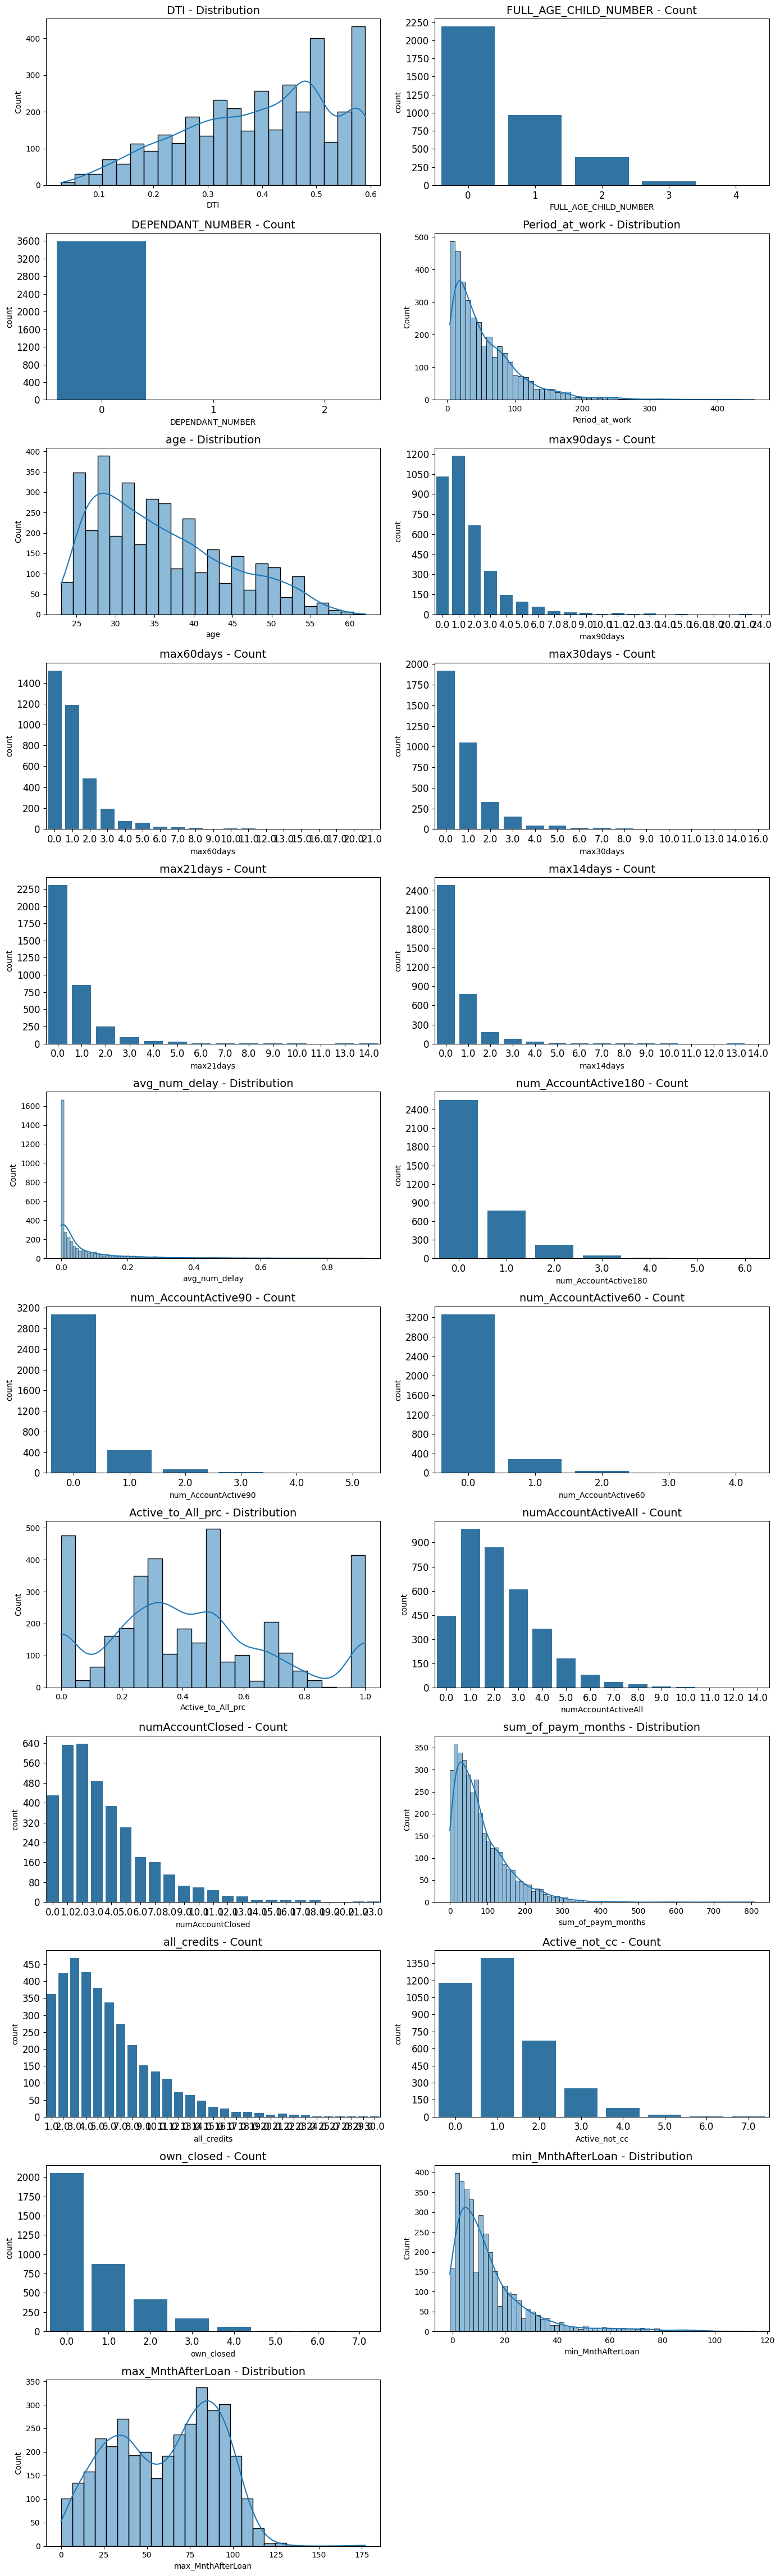

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

quant_int = ['FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER',
      'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
      'num_AccountActive180', 'num_AccountActive90',
       'num_AccountActive60', 'numAccountActiveAll',
       'numAccountClosed', 'all_credits',
       'Active_not_cc', 'own_closed']

quant_float = quantitative_vars.drop(['FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
      'num_AccountActive180', 'num_AccountActive90',
       'num_AccountActive60', 'numAccountActiveAll',
       'numAccountClosed', 'all_credits',
       'Active_not_cc', 'own_closed'], axis=1)

for col in quant_int:
    df[col] = df[col].round().astype(int)

# Create a figure to contain the subplots
fig, axes = plt.subplots(nrows=int(np.ceil(quantitative_vars.shape[1] / 2)), ncols=2, figsize=(14, quantitative_vars.shape[1] * 2))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Your existing plotting code
for i, col in enumerate(quantitative_vars.columns):
    ax = axes[i]
    if col in quant_float.columns:
        # If the column is numeric, plot a distribution plot
        sns.histplot(quantitative_vars[col], kde=True, ax=ax)
        ax.set_title(f'{col} - Distribution', fontsize=14)
    elif col in quant_int:
        # If the column is quantitative with integer, plot a count plot
        sns.countplot(x=col, data=quantitative_vars, ax=ax)
        ax.set_title(f'{col} - Count', fontsize=14)
        # Setting y-axis to have integer ticks
        ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        ax.tick_params(labelsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

The only anomaly that was found is in distribution of age, we can see peak of number of clients of definite age every 4 years. In other, data looks nice

Now let's investigate categorical variables and make portrait of usual client

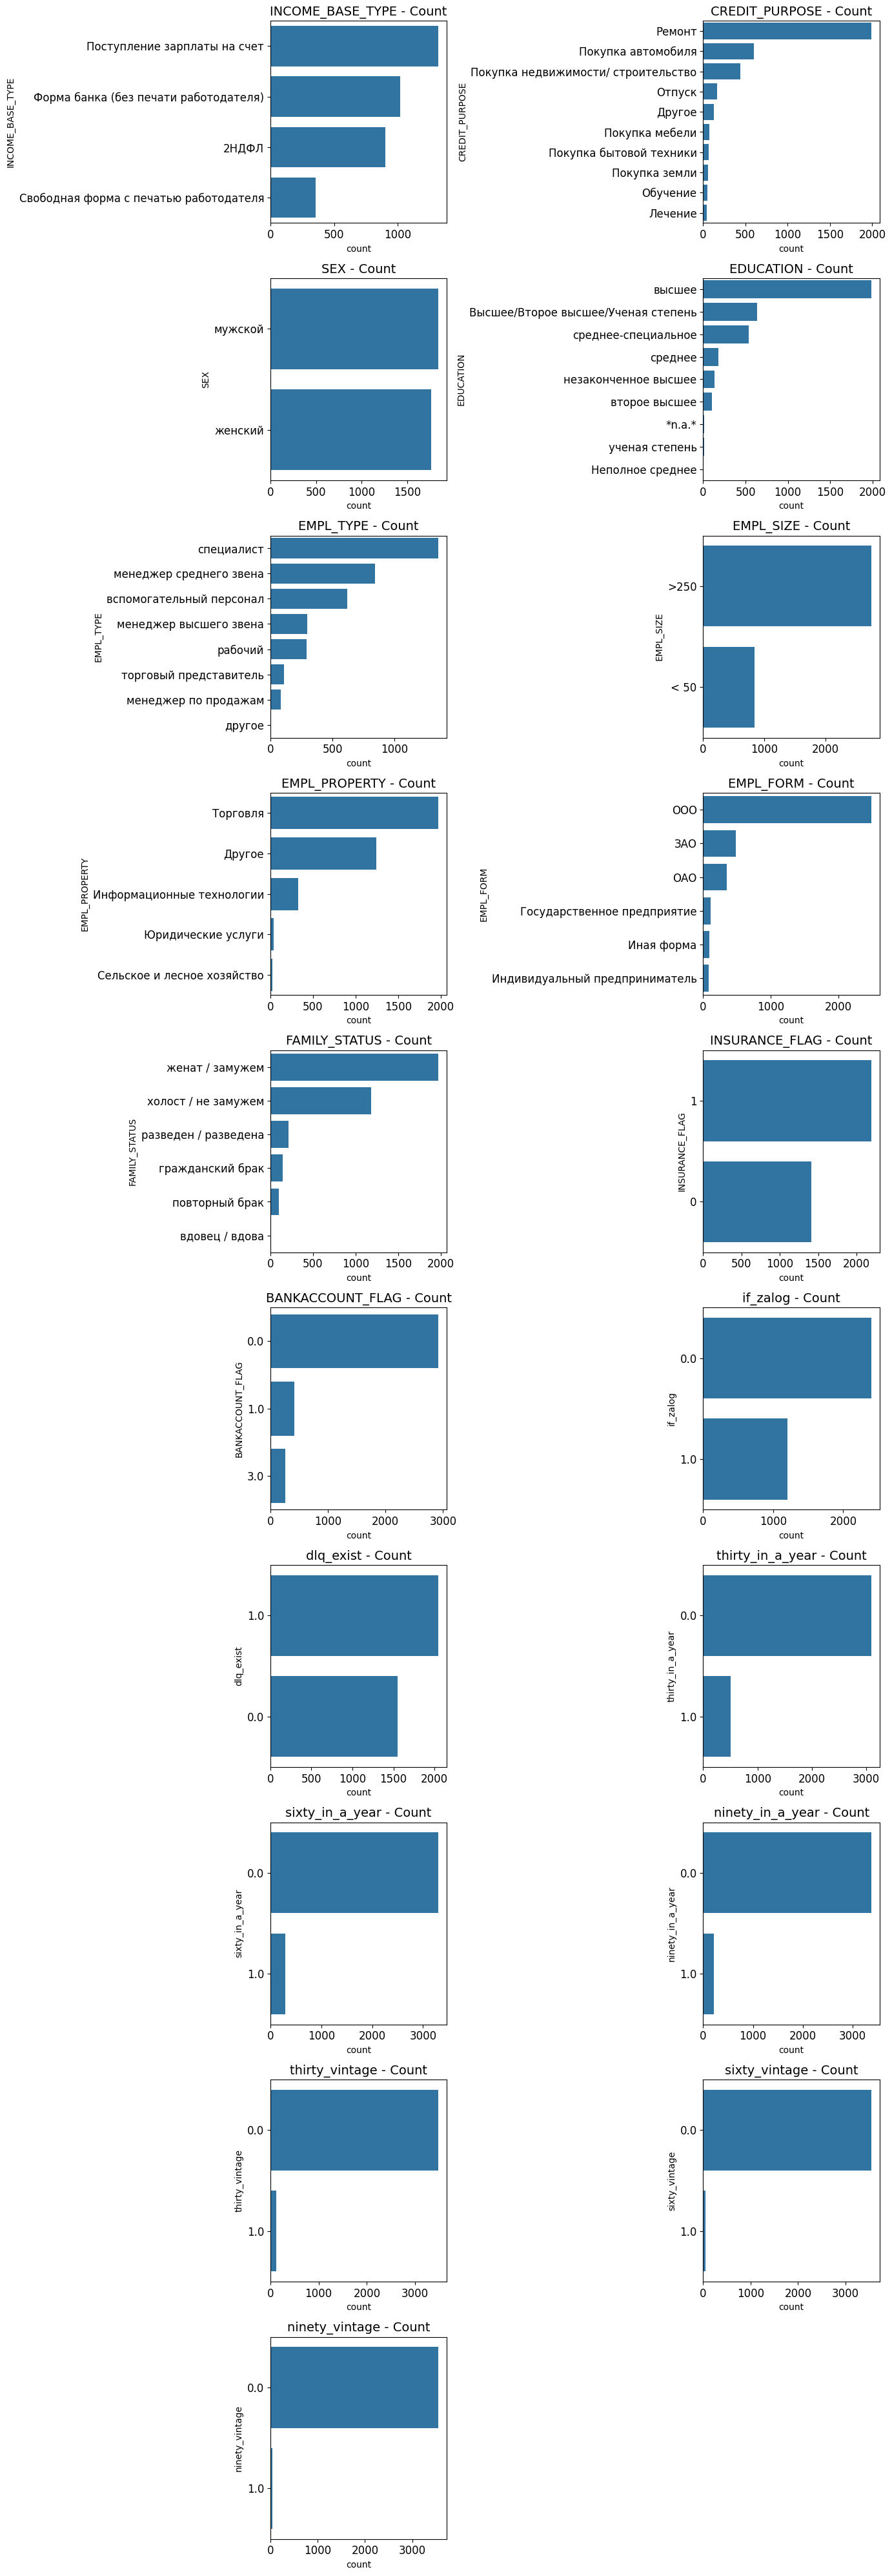

In [ ]:
categorical_columns = categorical_vars.columns
# If categorical_vars is a list, uncomment the following line:
# categorical_columns = categorical_vars

# Calculate the number of rows needed for the subplots
nrows = int(np.ceil(len(categorical_columns) / 2))

# Create a figure to contain the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(14, nrows * 4))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    # Create horizontal count plots for categorical variables
    sns.countplot(y=col, data=df, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f'{col} - Count', fontsize=14)
    ax.tick_params(labelsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Portrait of client:

- Married male
- Childless or single
- Holds a higher education degree
- Employed in a specialist position
- Receiving a salary greater than "250"
- Works in the trade sector
- Part of a limited liability company (OOO)
- Taking out a loan for home renovation
- Insuring the loan
- Without collateral
- Average age is 36

<font color=mediumseagreen><h4><b>$\omega$. Final Data mart</b></h4>

We need to return 'ID' column to the data mart, as it is very useful for data storage in company

In [ ]:
data_mart = df.copy()
data_mart.insert(0, 'ID', ID_column)
data_mart

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
3,1000067,Поступление зарплаты на счет,Ремонт,1,0.280,женский,0,0,высшее,специалист,...,1,94,97,1,0,0,0,0,0,0
4,1000087,Поступление зарплаты на счет,Покупка бытовой техники,0,0.230,мужской,0,0,высшее,менеджер по продажам,...,1,2,10,0,0,0,0,0,0,0
6,1000127,Форма банка (без печати работодателя),Ремонт,1,0.400,женский,1,0,второе высшее,менеджер среднего звена,...,0,4,76,1,0,0,0,0,0,0
7,1000147,Форма банка (без печати работодателя),Покупка мебели,1,0.500,женский,2,0,среднее-специальное,вспомогательный персонал,...,0,7,77,0,0,0,0,0,0,0
8,1000167,Поступление зарплаты на счет,Ремонт,1,0.480,женский,0,0,высшее,рабочий,...,0,2,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,1204567,Поступление зарплаты на счет,Покупка бытовой техники,0,0.580,женский,0,0,Высшее/Второе высшее/Ученая степень,специалист,...,0,0,4,0,0,0,0,0,0,0
10232,1204647,Свободная форма с печатью работодателя,Ремонт,0,0.530,мужской,0,0,высшее,специалист,...,1,6,104,0,0,0,0,0,0,0
10236,1204727,Форма банка (без печати работодателя),Ремонт,0,0.270,женский,1,0,Высшее/Второе высшее/Ученая степень,специалист,...,3,19,92,0,0,0,0,0,0,0
10238,1204767,Поступление зарплаты на счет,Ремонт,0,0.360,мужской,0,0,Высшее/Второе высшее/Ученая степень,менеджер по продажам,...,2,15,63,1,0,0,0,0,0,0


Here is represented final data mart. It contains:


*   3600 rows
*   20 categorical features
*   23 numerical features
*   0 missing values
*   0 incorrect values or symbols
*   Maximum completeness of data for each variable





In [ ]:
data.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000007,2НДФЛ,Покупка недвижимости/ строительство,0,0.570,мужской,1,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000027,Форма банка (без печати работодателя),Ремонт,1,0.520,женский,0,0,Высшее/Второе высшее/Ученая степень,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000047,Поступление зарплаты на счет,Ремонт,1,0.270,женский,0,0,высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000067,Поступление зарплаты на счет,Ремонт,1,0.280,женский,0,0,высшее,специалист,...,1,94,97,1,0,0,0,0,0,0
4,1000087,Поступление зарплаты на счет,Покупка бытовой техники,0,0.230,мужской,0,0,высшее,менеджер по продажам,...,1,2,10,0,0,0,0,0,0,0


<font color=b3713b><h1><b>$2$. Clusterization</b></h1>


<font color=mediumseagreen><h4><b>$\alpha$. Preparing data mart for clusterization</b></h4>

Before clusterization of our data, we need to transform our categorical variables into numerical

In 19 categorical features we have 10 binary, 9 nominal, 2 of which we can turn to binary and 1 ordinal variable. Let's transform them

In [ ]:
df_old = df.copy()

# Finding non binary categorical variables

non_binary = [value for value in categorical_columns if value not in columns_to_move]
non_binary
for i in non_binary:
  print(i, df[i].unique())

INCOME_BASE_TYPE ['Поступление зарплаты на счет' 'Форма банка (без печати работодателя)'
 '2НДФЛ' 'Свободная форма с печатью работодателя']
CREDIT_PURPOSE ['Ремонт' 'Покупка бытовой техники' 'Покупка мебели' 'Другое'
 'Покупка автомобиля' 'Покупка недвижимости/ строительство' 'Отпуск'
 'Обучение' 'Покупка земли' 'Лечение']
SEX ['женский' 'мужской']
EDUCATION ['высшее' 'второе высшее' 'среднее-специальное' '*n.a.*' 'среднее'
 'Высшее/Второе высшее/Ученая степень' 'незаконченное высшее'
 'ученая степень' 'Неполное среднее']
EMPL_TYPE ['специалист' 'менеджер по продажам' 'менеджер среднего звена'
 'вспомогательный персонал' 'рабочий' 'торговый представитель'
 'менеджер высшего звена' 'другое']
EMPL_SIZE ['>250' '< 50']
EMPL_PROPERTY ['Информационные технологии' 'Торговля' 'Другое'
 'Сельское и лесное хозяйство' 'Юридические услуги']
EMPL_FORM ['ООО' 'Государственное предприятие' 'ОАО'
 'Индивидуальный предприниматель' 'Иная форма' 'ЗАО']
FAMILY_STATUS ['женат / замужем' 'гражданский брак'

In [ ]:
# Define the mappings for ordinal encoding of 'EDUCATION'
education_mapping = {
    '*n.a.*': 0,  # Not available
    'Неполное среднее': 1,  # Incomplete secondary
    'среднее': 2,  # Secondary
    'среднее-специальное': 3,  # Secondary-special
    'высшее': 4,  # Higher
    'незаконченное высшее': 5,  # Incomplete higher
    'второе высшее': 6,  # Second higher
    'Высшее/Второе высшее/Ученая степень': 7,  # Higher/Second higher/Degree
    'ученая степень': 8  # Academic degree
}

# Apply the mapping to the 'EDUCATION' column
df['EDUCATION'] = df['EDUCATION'].map(education_mapping)

# One-hot encoding
categorical_cols = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df.head()

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
3,1,0.280,0,0,4,0,154,45,2,2,...,0,0,0,0,1,0,1,0,0,0
4,0,0.230,0,0,4,0,14,26,2,0,...,0,0,0,0,1,0,1,0,0,0
6,1,0.400,1,0,6,0,102,36,0,0,...,0,0,0,0,1,0,1,0,0,0
7,1,0.500,2,0,3,0,22,27,3,0,...,0,0,0,0,1,1,0,0,0,0
8,1,0.480,0,0,4,0,25,25,2,1,...,0,0,0,0,1,0,0,0,1,0


Now, after coding categorical features, we have 69 variables in our dataset

<font color=mediumseagreen><h4><b>$\beta$. Additional EDA</b></h4>

Now let's look at the relationships between our variables to properly choose method of clasterization

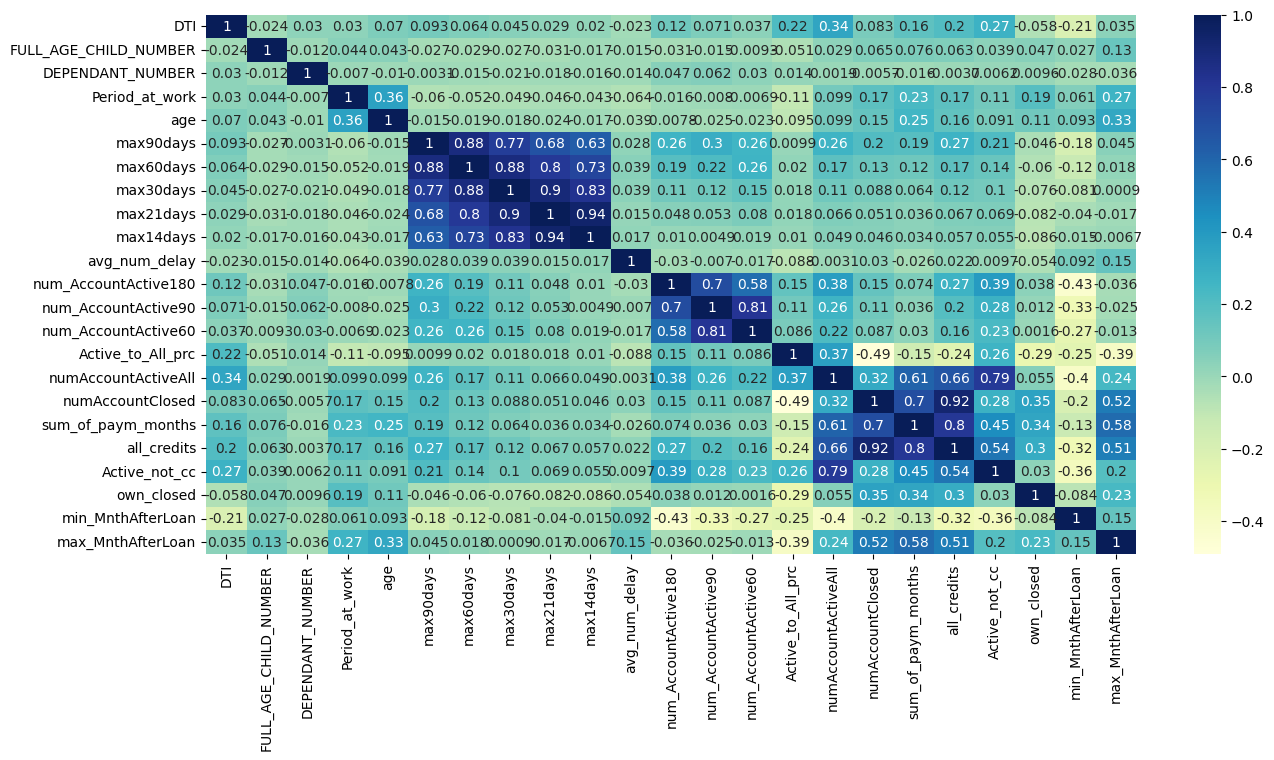

In [ ]:
df_old_quant = df_old.drop(categorical_columns, axis=1)
fig = plt.figure(figsize = (15, 7))
sns.heatmap(df_old_quant.corr(), annot=True, cmap = 'YlGnBu');

As we can see from matrix above, our variables correlates poorely, so using linear models will be bad idea. Instead, we should use model that can find some complex and non-linear relationship. However, I have hypothesis, that in our case nature of relationships is not very complex and we shouldn't use some deep neural networks or more resource - efficient and hard inpretable methods.
So, for the above K-mean model is very suitable. It can find non-linear relationship, don't require many computing power and easy to understand, so let's start with it

<font color=mediumseagreen><h4><b>$\gamma$. K-means</b></h4>


In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
from sklearn.preprocessing import Normalizer

# Initialize the Normalizer
normalizer = Normalizer()

# Fit the normalizer to data and transform
X = normalizer.fit_transform(df)

# Convert the array back to a DataFrame
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [ ]:
%%time
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, random_state=21).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    print('{} / {}'.format(k,K[-1]))

1 / 9
2 / 9
3 / 9
4 / 9
5 / 9
6 / 9
7 / 9
8 / 9
9 / 9
CPU times: user 14.7 s, sys: 4.77 s, total: 19.5 s
Wall time: 14.9 s


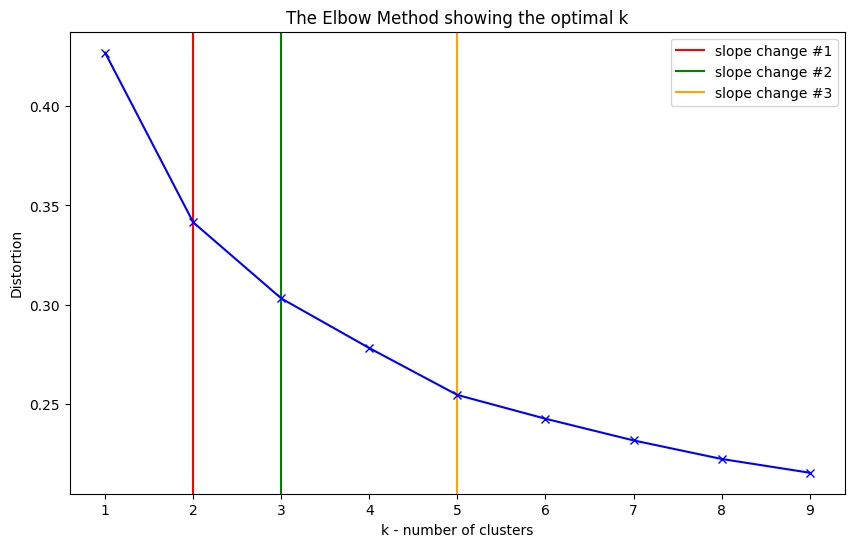

In [ ]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.axvline(2, 0, 1, label='slope change #1', color='red')
plt.axvline(3, 0, 1, label='slope change #2', color='green')
plt.axvline(5, 0, 1, label='slope change #3', color='orange')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

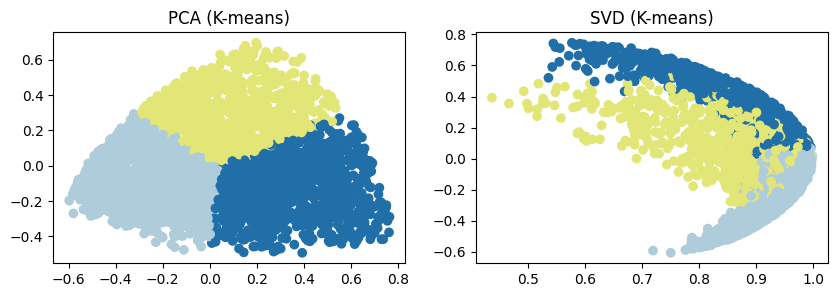

In [ ]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This is needed for 3D plotting

K = 3

kmeanModel = KMeans(n_clusters=K).fit(X) # BEST

Y_pca = PCA(n_components=2).fit_transform(X);
Y_svd = TruncatedSVD(n_components=2).fit_transform(X);

np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr)

plt.subplot(1, 2, 2)
plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr)

plt.show()

As you can see, I got good-looking 3 clusters, but when I started to interpret them I faced some problems, because they were practically the same.

So I decide to use third "elbow", where number of clusters is 5

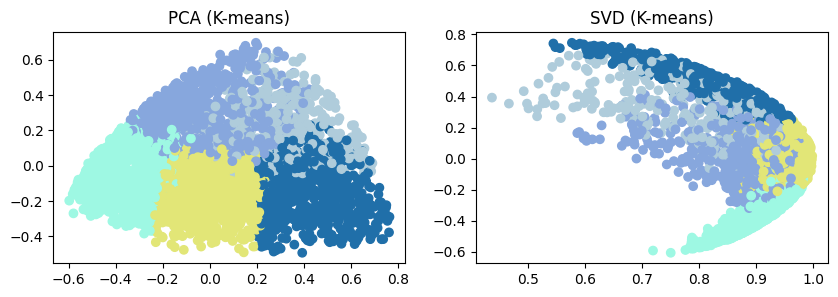

In [ ]:
K = 5

kmeanModel = KMeans(n_clusters=K).fit(X) # BEST

Y_pca = PCA(n_components=2).fit_transform(X);
Y_svd = TruncatedSVD(n_components=2).fit_transform(X);

np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr)

plt.subplot(1, 2, 2)
plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr)

plt.show()

As you can see, for K=5 some clusters lay on each other, so I started to test different techniques to solve this problem: deleted outliers, tried different scaling methods, used other values of k and practically rejected K-means method. But then I wanted to test the hypothesis, that data has very complex relationship and it's very hard to understand clusters in 2 dimensions.
So i decided to look at clusters in 3D

In [ ]:
K = 5

# Adjust to 3 components for 3D visualization
Y_pca = PCA(n_components=3).fit_transform(X)
Y_svd = TruncatedSVD(n_components=3).fit_transform(X)

kmeanModel = KMeans(n_clusters=K).fit(X)

np.random.seed(21)
colors = np.random.randint(0,255, size=(K, 3))

# Convert cluster labels to color
c_arr = np.array(list(map(lambda x: f'rgb({colors[x][0]}, {colors[x][1]}, {colors[x][2]})', kmeanModel.labels_)))

# PCA Plot
fig_pca = go.Figure(data=[go.Scatter3d(
    x=Y_pca[:, 0],
    y=Y_pca[:, 1],
    z=Y_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=c_arr,  # set color to an array/list of desired values
    )
)])

fig_pca.update_layout(title='3D PCA (K-means)', scene=dict(
                    xaxis_title='PC1',
                    yaxis_title='PC2',
                    zaxis_title='PC3'))
fig_pca.show()

When we built 3D clusters visualization, picture become clear. We can see (it is possible to spin and work with in the IDLE) that our cluster has complex structure and can't be fully represented in 2 dimension. In 3D plot we see that every cluster is well separated, and every cluster is very compact. Boundaries between clusters are quite definite, clusters are compact

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(X, kmeanModel.labels_)
davies_bouldin = davies_bouldin_score(X, kmeanModel.labels_)

print("Silhouette Score:", silhouette_avg, '. This score suggests that the clusters are somewhat separated from each other but not distinctly.')
print("Davies-Bouldin Index:", davies_bouldin, '. This score is relatively low, suggesting that the clusters are reasonably compact and separated from each other.')

Silhouette Score: 0.2782258884735367 . This score suggests that the clusters are somewhat separated from each other but not distinctly.
Davies-Bouldin Index: 1.105841472890926 . This score is relatively low, suggesting that the clusters are reasonably compact and separated from each other.


Let's now investigate obtained cluster

In [ ]:
# Getting labels
cluster_labels = kmeanModel.labels_

# Adding labels
df_old2 = df.copy()
df_old2['Cluster'] = cluster_labels

# Filter dataframe where Label is 0
df_filtered0 = df_old2[df_old2['Cluster'] == 0]

# Filter dataframe where Label is 1
df_filtered1 = df_old2[df_old2['Cluster'] == 1]

# Filter dataframe where Label is 2
df_filtered2 = df_old2[df_old2['Cluster'] == 2]

# Filter dataframe where Label is 3
df_filtered3 = df_old2[df_old2['Cluster'] == 3]

# Filter dataframe where Label is 4
df_filtered4 = df_old2[df_old2['Cluster'] == 4]

In [ ]:
# Exploring mean values of categorical variables
mean_df1 = df_filtered0.median()
mean_df2 = df_filtered1.median()
mean_df3 = df_filtered2.median()
mean_df4 = df_filtered3.median()
mean_df5 = df_filtered4.median()

mean_df = pd.DataFrame({'Cluster 1': mean_df1, 'Cluster 2': mean_df2, 'Cluster 3': mean_df3, 'Cluster 4': mean_df4, 'Cluster 5': mean_df5})

median_df = mean_df.drop(quantitative_vars.columns, axis=0)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(median_df)

                                                    Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
INSURANCE_FLAG                                              1          1          1          1          1
EDUCATION                                                   4          4          4          4          4
BANKACCOUNT_FLAG                                            0          0          0          0          0
if_zalog                                                    0          0          0          0          0
dlq_exist                                                   1          0          1          1          0
thirty_in_a_year                                            0          0          0          0          0
sixty_in_a_year                                             0          0          0          0          0
ninety_in_a_year                                            0          0          0          0          0
thirty_vintage                                

In [ ]:
# Getting labels
df_old2 = df_old.copy()
df_old2['Cluster'] = cluster_labels

# Filter dataframe where Label is 0
df_filtered0 = df_old2[df_old2['Cluster'] == 0]

# Filter dataframe where Label is 1
df_filtered1 = df_old2[df_old2['Cluster'] == 1]

# Filter dataframe where Label is 2
df_filtered2 = df_old2[df_old2['Cluster'] == 2]

# Filter dataframe where Label is 3
df_filtered3 = df_old2[df_old2['Cluster'] == 3]

# Filter dataframe where Label is 4
df_filtered4 = df_old2[df_old2['Cluster'] == 4]

mean_df1 = df_filtered0.mean()
mean_df2 = df_filtered1.mean()
mean_df3 = df_filtered2.mean()
mean_df4 = df_filtered3.mean()
mean_df5 = df_filtered4.mean()

# Researching quantative variables mean
mean_df = pd.DataFrame({'Cluster 1': mean_df1, 'Cluster 2': mean_df2, 'Cluster 3': mean_df3, 'Cluster 4': mean_df4, 'Cluster 5': mean_df5})
binary = categorical_columns.drop(non_binary)
mean_df = mean_df.drop(binary, axis=0)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(mean_df)

                       Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
DTI                        0.418      0.382      0.411      0.366      0.371
FULL_AGE_CHILD_NUMBER      0.573      0.400      0.541      0.541      0.520
DEPENDANT_NUMBER           0.002          0      0.003          0      0.003
Period_at_work            33.116     20.089     82.806     26.543    113.606
age                       35.795     34.681     35.902     34.626     37.696
max90days                  2.028      1.372      1.718      1.447      1.071
max60days                  1.331      1.011      1.161      1.078      0.800
max30days                  0.949      0.778      0.849      0.839      0.654
max21days                  0.678      0.625      0.586      0.618      0.518
max14days                  0.560      0.531      0.449      0.518      0.428
avg_num_delay              0.060      0.035      0.054      0.102      0.044
num_AccountActive180       0.457      0.464      0.412      0.259      0.309

<font color=lightgreen><h3><b>Results and recommendations</b></h3>

<font color="MediumSeaGreen"><h4><b>Cluster 1: The High-Risk, High-Activity Group<br>"The Established Risk-Takers"</b></h4></font>
<ul>
<li>All have insurance and a high education level.</li>
<li>Employed at large companies (>250 employees) in the trade sector, working in LLCs.</li>
<li>Predominantly married males.</li>
<li>High credit activity with the highest average of 90+ days delinquencies, indicating a propensity for taking financial risks.</li>
<li>These clients often engage in significant financial transactions, suggesting a familiarity and comfort with leveraging debt for personal or investment purposes.</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>
<ul>
<li><b>Risk Management:</b> Given their high delinquency rate, offer products with higher interest rates to mitigate risk or require co-signers.</li>
<li><b>Loyalty Programs:</b> To encourage timely payments, introduce rewards for on-time payment behavior.</li>
<li><b>Financial Education:</b> Provide resources on managing finances and debt to help reduce future delinquencies. Tailored advice on financial planning and investment could further engage this segment.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 2: The Stable, Low-Risk Professionals<br>"The Secure Anchors"</b></h4></font>
<ul>
<li>Similar demographic and employment characteristics to Cluster 1 but with significantly lower delinquencies.</li>
<li>The longest average period of employment, indicating job stability and a reliable income stream.</li>
<li>Lower credit activity compared to Cluster 1, suggesting a more cautious approach to financial commitments and borrowing.</li>
<li>These clients typically exhibit a conservative financial behavior, preferring savings and investments over high debt levels.</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>
<ul>
<li><b>Premium Offers:</b> Target with low-interest rate products due to their stability and lower risk profile. This could include exclusive mortgage rates or auto loans.</li>
<li><b>Exclusive Services:</b> Offer exclusive banking services or access to premium credit cards as incentives for their loyalty and stability. Consider providing personal financial advisory services to cater to their investment and savings-oriented mindset.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 3: The Emerging Youngsters<br>"The Financial Newcomers"</b></h4></font>
<ul>
<li>Characterized by the lowest credit activity, indicating a cautious or limited history with financial products.</li>
<li>The shortest average period of employment, which may reflect a younger demographic or those new to the workforce.</li>
<li>Limited engagement with high-risk financial behaviors, suggesting a potential lack of financial literacy or access to credit.</li>
<li>This group might benefit from products aimed at building credit history and financial education focused on long-term financial health.</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>
<ul>
<li><b>Credit Building Products:</b> Offer products designed to help build or improve their credit score, such as secured credit cards or small personal loans with clear, manageable repayment plans.</li>
<li><b>Educational Resources:</b> Provide workshops or online resources on budgeting, saving, and investing to help them establish healthy financial habits early on.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 4: The Leveraged Optimists<br>"High-Delinquency Challengers"</b></h4></font>
<ul>
<li>Exhibits the highest levels of debt and delinquency rates, indicating a group highly comfortable with leveraging credit but facing challenges in managing it effectively.</li>
<li>Engages in active credit use, suggesting confidence in financial dealings but a potential underestimation of risk or overextension in financial obligations.</li>
<li>Possesses a mix of marital statuses, implying varied financial responsibilities and obligations that may contribute to their credit behavior.</li>
<li>This cluster's behavior suggests a need for solutions that address debt management and financial stability.</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>
<ul>
<li><b>Debt Consolidation Programs:</b> Offer services to consolidate their debts into a single, more manageable loan, potentially with a lower interest rate.</li>
<li><b>Financial Counseling:</b> Provide access to counseling services to help them understand their financial situation and develop a plan to improve it.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 5: The Diverse Moderates<br>"The Calculated Balancers"</b></h4></font>
<ul>
<li>Moderate credit activity with a balanced approach to financial management, showing neither the highest nor the lowest levels of engagement in financial products.</li>
<li>Features a diverse range of financial behaviors, possibly reflecting a broad demographic with varied financial goals and needs.</li>
<li>The presence of both married and single individuals suggests a mix of financial responsibilities and planning styles.</li>
<li>Indicates a segment that could be receptive to a wide range of financial products, from savings to credit, depending on individual circumstances.</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>
<ul>
<li><b>Flexible Financial Products:</b> Offer a range of financial products that cater to their diverse needs, including savings accounts, credit cards, and investment products with varying levels of risk and return.</li>
<li><b>Personalized Financial Planning:</b> Provide personalized financial planning services to help individuals within this cluster meet their specific financial goals, whether that's debt reduction, savings growth, or investment.</li>
</ul>


<font color=mediumseagreen><h4><b>$\omega$. RFM</b></h4>

Now let's try to make clustering focusing on client behaviour rather than on demographic characteristics. Good way to perfom this task is to use RFM analysis. It segments customers based on their recent transactional behavior, frequency of transactions, and monetary value. This allows for a more personalized understanding of customers' needs and preferences.

One more advantage of this analysis is that it is easy to interpret it.

Taking into account weak correlation of our data, RFM also looks suitable, because it doesn't require strong correlation

In [ ]:
#Recency — number of days since the last credit min_MnthAfterLoan
#Frequency — number of transactions made over a given period all_credits
#Monetary — amount spent over a given period of time sum_of_paym_months
new_df = df.copy()

In [ ]:
df = df_old.copy()

In [ ]:
df['Recency'] = df['min_MnthAfterLoan']
df['Frequency'] = df['all_credits']
df['Monetary'] = df['sum_of_paym_months']

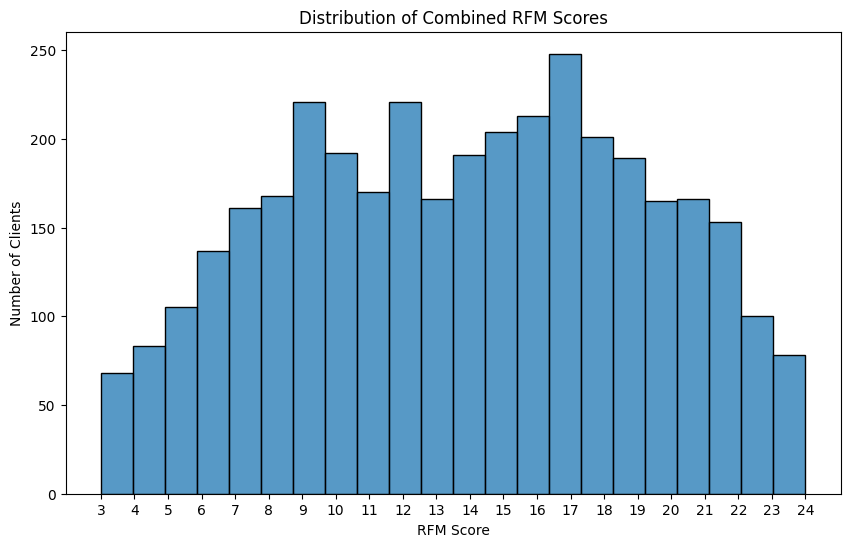

In [ ]:
# Convert quartile labels to integers
df['R_Score'] = pd.qcut(df['Recency'], 8, labels=[1, 2, 3, 4, 5, 6, 7, 8]).astype(int)
df['F_Score'] = pd.qcut(df['Frequency'], 8, labels=[8, 7, 6, 5, 4, 3, 2, 1]).astype(int)
df['M_Score'] = pd.qcut(df['Monetary'], 8, labels=[8, 7, 6, 5, 4, 3, 2, 1]).astype(int)

# Calculate combined RFM score
df['RFM_Score'] = df['R_Score'] + df['F_Score'] + df['M_Score']

# Plot the distribution of combined RFM Score
plt.figure(figsize=(10, 6))
sns.histplot(df['RFM_Score'], bins=(df['RFM_Score'].max() - df['RFM_Score'].min() + 1), kde=False)
plt.title('Distribution of Combined RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Number of Clients')
plt.xticks(range(df['RFM_Score'].min(), df['RFM_Score'].max() + 1))  # Ensure ticks for every possible score
plt.show()

In [ ]:
def assign_cluster(rfm_score):
    if rfm_score <= 5:
        return 0
    elif rfm_score <= 9:
        return 1
    elif rfm_score <= 13:
        return 2
    elif rfm_score <= 18:
        return 3
    elif rfm_score <= 22:
        return 4
    elif rfm_score <= 24:
        return 5
    else:
        return 7  # For scores above 24, if any

In [ ]:
# Adding labels
df_old2 = new_df.copy()

# Apply the function to assign clients to clusters
df_old2['Cluster'] = df['RFM_Score'].apply(assign_cluster)

# Filter dataframe where Label is 0
df_filtered0 = df_old2[df_old2['Cluster'] == 0]

# Filter dataframe where Label is 1
df_filtered1 = df_old2[df_old2['Cluster'] == 1]

# Filter dataframe where Label is 2
df_filtered2 = df_old2[df_old2['Cluster'] == 2]

# Filter dataframe where Label is 3
df_filtered3 = df_old2[df_old2['Cluster'] == 3]

# Filter dataframe where Label is 4
df_filtered4 = df_old2[df_old2['Cluster'] == 4]

# Filter dataframe where Label is 5
df_filtered5 = df_old2[df_old2['Cluster'] == 5]

In [ ]:
# Exploring mean values of quantative variables
mean_df1 = df_filtered0.median()
mean_df2 = df_filtered1.median()
mean_df3 = df_filtered2.median()
mean_df4 = df_filtered3.median()
mean_df5 = df_filtered4.median()
mean_df6 = df_filtered5.median()

mean_df = pd.DataFrame({'Cluster 1': mean_df1, 'Cluster 2': mean_df2, 'Cluster 3': mean_df3, 'Cluster 4': mean_df4, 'Cluster 5': mean_df5, 'Cluster 6': mean_df6})

median_df = mean_df.drop(quantitative_vars.columns, axis=0)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(median_df)

                                                    Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6
INSURANCE_FLAG                                              1          1          1          1          1          1
EDUCATION                                                   4          4          4          4          4          4
BANKACCOUNT_FLAG                                            0          0          0          0          0          0
if_zalog                                                    0          0          0          0          0          0
dlq_exist                                                   1          1          1          0          0          0
thirty_in_a_year                                            0          0          0          0          0          0
sixty_in_a_year                                             0          0          0          0          0          0
ninety_in_a_year                                            0   

In [ ]:
# Getting labels
df_old2 = df_old.copy()
# Apply the function to assign clients to clusters
df_old2['Cluster'] = df['RFM_Score'].apply(assign_cluster)

# Filter dataframe where Label is 0
df_filtered0 = df_old2[df_old2['Cluster'] == 0]

# Filter dataframe where Label is 1
df_filtered1 = df_old2[df_old2['Cluster'] == 1]

# Filter dataframe where Label is 2
df_filtered2 = df_old2[df_old2['Cluster'] == 2]

# Filter dataframe where Label is 3
df_filtered3 = df_old2[df_old2['Cluster'] == 3]

# Filter dataframe where Label is 4
df_filtered4 = df_old2[df_old2['Cluster'] == 4]

# Filter dataframe where Label is 5
df_filtered5 = df_old2[df_old2['Cluster'] == 5]

mean_df1 = df_filtered0.mean()
mean_df2 = df_filtered1.mean()
mean_df3 = df_filtered2.mean()
mean_df4 = df_filtered3.mean()
mean_df5 = df_filtered4.mean()
mean_df6 = df_filtered5.mean()

# Researching quantative variables mean
mean_df = pd.DataFrame({'Cluster 1': mean_df1, 'Cluster 2': mean_df2, 'Cluster 3': mean_df3, 'Cluster 4': mean_df4, 'Cluster 5': mean_df5, 'Cluster 6': mean_df6})
binary = categorical_columns.drop(non_binary)
mean_df = mean_df.drop(binary, axis=0)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(mean_df)

                       Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6
DTI                        0.438      0.433      0.411      0.387      0.352      0.316
FULL_AGE_CHILD_NUMBER      0.594      0.557      0.594      0.519      0.464      0.421
DEPENDANT_NUMBER           0.004      0.001      0.003      0.003          0          0
Period_at_work            80.289     65.932     54.840     51.985     50.651     49.315
age                       38.398     37.061     36.397     34.763     34.721     35.264
max90days                  3.109      2.138      1.649      1.346      0.978      1.096
max60days                      2      1.370      1.132      0.951      0.808      0.910
max30days                  1.359      0.994      0.826      0.728      0.651      0.815
max21days                  0.918      0.675      0.585      0.541      0.532      0.730
max14days                  0.727      0.539      0.474      0.435      0.455      0.663
avg_num_delay              0.060

<font color="MediumSeaGreen"><h4><b>Cluster 1: VIP Clients</b></h4></font>

<ul>
<li>Demographics: Predominantly employed in trade sectors with stable employment at larger organizations (EMPL_SIZE >250). This group might have a higher income base, indicated by stable payment patterns and active credit usage.</li>
<li>Marital Status: Mostly married, suggesting family commitments and possibly higher financial stability.</li>
<li>Sex: Mostly women</li>
<li>Age: Middle-aged, suggesting maturity and financial awareness.</li>
<li>All credits: 14
</li>
<li>Has 2 active credits
</li>
<li>Pays 203 in month
</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>

<ul>
<li><b>Tailored Premium Services:</b> Offer exclusive banking services and investment advice that cater to family-oriented needs, financial growth, and stability.</li>
<li><b>Personalized Offers:</b> Provide customized offers and incentives to enhance loyalty and engagement.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 2: Loyal Clients</b></h4></font>

<ul>
<li>Demographics: Similar to VIP Clients, with strong ties to the trade sector and stable employment. Likely to have a solid financial foundation.</li>
<li>Marital Status: Mostly married, indicating stable family structures.</li>
<li>Sex: Slightly more diverse, with a mix of males and females.</li>
<li>Age: Slightly younger than Cluster 1, indicating early to mid-career stages.</li>
<li>All credits: 9
</li>
<li>Has 2 active credits
</li>
<li>Pays 137 in month
</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>

<ul>
<li><b>Financial Growth Products:</b> Focus on products that assist in financial growth, such as savings plans, investment options, and family insurance packages.</li>
<li><b>Customer Engagement:</b> Implement strategies to enhance customer engagement and loyalty through personalized interactions.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 3: Potential Growth Clients</b></h4></font>

<ul>
<li>Demographics: Engaged in trade, with a moderate level of financial activity. Their engagement suggests potential for growth.</li>
<li>Marital Status: Married, similar to the first two clusters, but potentially at different life stages.</li>
<li>Sex: Balanced gender distribution.</li>
<li>Age: Comparable to Cluster 2, possibly in the growth phase of their careers.</li>
<li>All credits: 6
</li>
<li>Has 1 active credits
</li>
<li>Pays 94 in month
</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>

<ul>
<li><b>Financial Planning Services:</b> Offer financial planning services and educational seminars on investment to nurture growth and loyalty.</li>
<li><b>Incentives:</b> Provide incentives for increased product usage to foster loyalty and maximize growth potential.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 4: Stable Clients</b></h4></font>

<ul>
<li>Demographics: Engaged in the trade sector but with less financial activity compared to the top clusters. This group may benefit from financial education and engagement initiatives.</li>
<li>Marital Status: Mostly married, indicating stable personal circumstances but potentially more conservative in financial matters.</li>
<li>Sex: Balanced gender distribution.</li>
<li>Age: Slightly younger, indicating individuals who are establishing their financial footing.</li>
<li>All credits: 4
</li>
<li>Has 1 active credits
</li>
<li>Pays 50 in month
</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>

<ul>
<li><b>Financial Education:</b> Introduce budgeting tools, financial planning services, and easy-to-understand investment products to encourage more active financial management.</li>
<li><b>Engagement Initiatives:</b> Implement initiatives to increase engagement and empower clients to take control of their finances.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 5: At-Risk Clients</b></h4></font>

<ul>
<li>Demographics: Lower engagement and financial activity. This group might be experiencing financial difficulties or dissatisfaction with services.</li>
<li>Marital Status: Mostly married, but with indications that financial pressures may be affecting their banking activity.</li>
<li>Sex: Balanced gender distribution.</li>
<li>Age: Similar to Cluster 4, possibly facing career and financial challenges.</li>
<li>All credits: 2
</li>
<li>Has 0 active credits
</li>
</ul>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>

<ul>
<li><b>Personalized Financial Consultations:</b> Provide personalized financial consultations to understand individual needs and offer tailored solutions.</li>
<li><b>Support Systems:</b> Communicate available support systems and restructuring options to assist clients in overcoming financial challenges.</li>
</ul>

<font color="MediumSeaGreen"><h4><b>Cluster 6: Inactive Clients</b></h4></font>

<ul>
<li>Demographics: The least engaged, possibly due to having left the institution or significantly reduced their financial activity. This group has the lowest scores across financial behaviors.</li>
<li>Marital Status: A mix, with a slight indication towards not being married, which may reflect life changes or transitions.</li>
<li>Sex: No specific data, but the lack of engagement suggests a broader dissatisfaction or significant life events affecting their financial activity.</li>
<li>Age: Slightly older, suggesting that changes in financial needs or life stages may influence their banking behavior.</li>
<li>Income Base Type: Unique in receiving salary payments directly to the account, indicating formal employment but perhaps at places not engaging enough in financial planning or services.</li>
</ul>
<li>All credits: 1
</li>
<li>Has 0 active credits
</li>
<font color="#41baea"><h4><b>Recommendations:</b></h4></font>

<ul>
<li><b>Re-engagement Strategies:</b> Explore re-engagement strategies focusing on understanding their needs and past dissatisfaction.</li>
<li><b>Tailored Products:</b> Offer tailored products or services that address their current life stage or financial goals.</li>
<li><b>Customer Outreach:</b> Conduct outreach to understand their reasons for disengagement and address any service gaps identified.</li>
</ul>